In [1]:
%pylab inline

from importlib import reload
import zernike
reload(zernike)

Populating the interactive namespace from numpy and matplotlib


<module 'zernike' from 'D:\\Github\\smlm-dl\\smlm_dl\\zernike.py'>

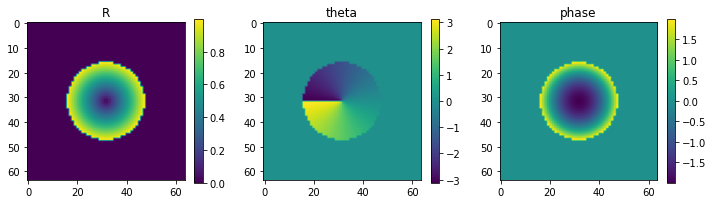

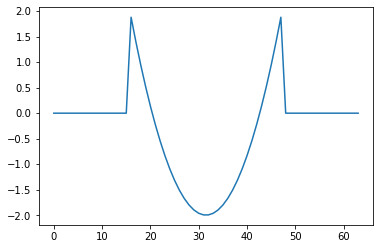

In [2]:
u = np.linspace(-1, 1, 64) / 0.5
U, V = np.meshgrid(u, u, indexing='ij')
R = np.sqrt(U**2 + V**2)
theta = np.arctan2(U, V)

pupil = zernike.calculate_pupil_phase(R, theta, {4:2})

fig, axes = subplots(1, 3, figsize=(12, 3))
im = axes[0].imshow(R*(R<=1))
colorbar(im, ax=axes[0])
axes[0].set_title('R')
im = axes[1].imshow(theta*(R<=1))
colorbar(im, ax=axes[1])
axes[1].set_title('theta')
im = axes[2].imshow(pupil)
colorbar(im, ax=axes[2])
axes[2].set_title('phase')

figure()
plot(pupil[pupil.shape[0]//2])

{0: -0.5546638543612061, 1: 0.35835793405573413, 2: -0.48312994065409853, 3: -0.23783114292540786, 4: -0.753450468904387, 5: 0.40445463351388633, 6: -0.7968134913738234, 7: 0.905463103296891, 8: -0.485698870453354, 9: 0.35592867237889547, 10: -0.2665429015082481, 11: 0.9547592327308716, 12: 0.8252031542871445, 13: -0.7878899538705839, 14: 0.13520778597966743, 15: -0.588124519437903}


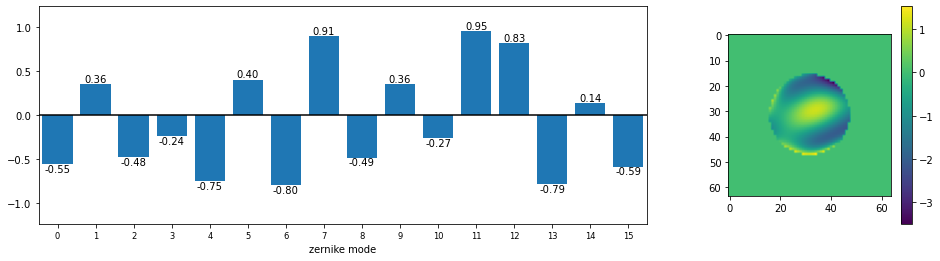

In [3]:
test_zerns = {i: np.random.uniform(-1,1) for i in np.arange(0,16)}
print(test_zerns)
test_pupil = zernike.calculate_pupil_phase(R, theta*(R<=1), test_zerns)

fig, axes = subplots(1, 2, figsize=(16,4), gridspec_kw={'width_ratios': [3, 1]})
zernike.plot_zernike_coeffs(axes[0], test_zerns)
im = axes[1].imshow(test_pupil)
colorbar(im, ax=axes[1])

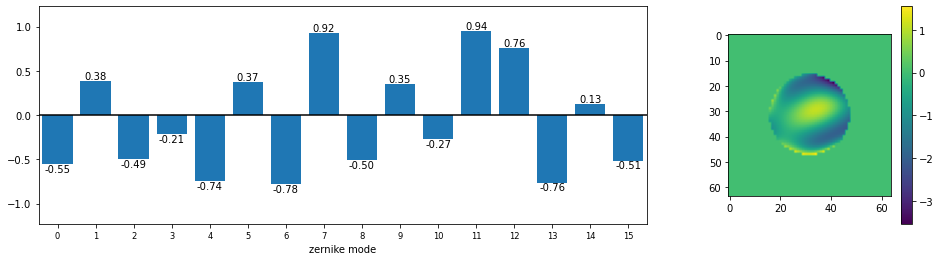

In [4]:
fitted_zerns = zernike.fit_zernike_from_pupil((R<=1)*np.exp(1j*test_pupil), 16, R, theta)

fig, axes = subplots(1, 2, figsize=(16,4), gridspec_kw={'width_ratios': [3, 1]})
zernike.plot_zernike_coeffs(axes[0], fitted_zerns)

im = axes[1].imshow(zernike.calculate_pupil_phase(R, theta*(R<=1), fitted_zerns))
colorbar(im, ax=axes[1])

{0: -0.5451295477790259, 1: -1.00295249192238e-16, 2: -4.3657932001327126e-16, 3: -0.21213215548625067, 4: -6.604445711444535e-17, 5: 0.37329839160401596, 6: -0.7749106151439923, 7: 0.9062493336477819, 8: -0.4822879974660971, 9: 0.3519014185415458, 10: -0.2665429015082475, 11: 0.9442797862898892, 12: 0.7960167011652828, 13: -0.7619693176724287, 14: 0.1415903027392106, 15: -0.5185890469015919}


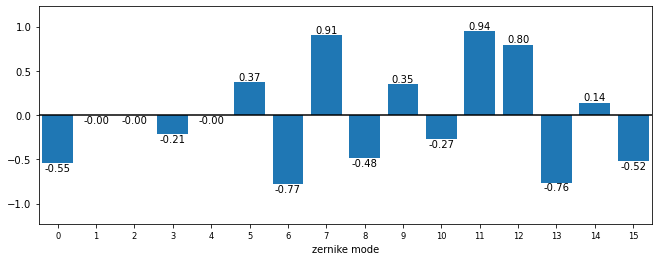

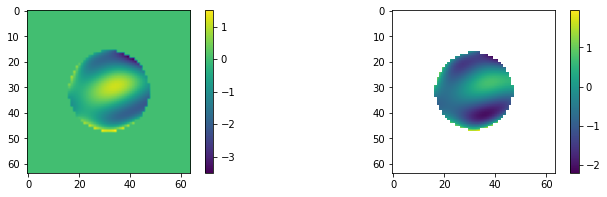

In [5]:
a = zernike.PupilPhase(U, V)

corrected_pupil = test_pupil - a.remove_tilt_tip_defocus(test_pupil)
corrected_zerns = zernike.fit_zernike_from_pupil((R<=1)*np.exp(1j*corrected_pupil), 16, R, theta)
print(corrected_zerns)

fig, ax = subplots(1, 1, figsize=(11,4), )
zernike.plot_zernike_coeffs(ax, corrected_zerns)

fig, axes = subplots(1, 2, figsize=(12, 3))
im = axes[0].imshow(test_pupil)
colorbar(im, ax=axes[0])
im = axes[1].imshow(corrected_pupil)
colorbar(im, ax=axes[1])